In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [30]:
df = pd.read_excel("C:/Users/Selam/Desktop/smiplilearn/capstone video/project3/datasets_healthcare/data.xlsx")

In [31]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
#Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.
#Statical glimpse in to the dataset  
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [35]:
df.shape

(303, 14)

In [36]:
#finding duplicates
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [37]:
#droping duplicates
df1= df.drop_duplicates().copy()

In [38]:
df1[df.duplicated()]

<ipython-input-38-5cc5eb0cac90>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[df.duplicated()]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [39]:
#No missing values
df.isna().sum(axis= 0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

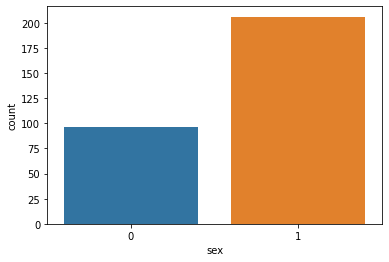

In [40]:
#Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.
#Categorical variables
#sex 	 (1 = male; 0 = female)


sns.countplot(x="sex", data=df1)
#The number of males is almost double to the number of females

<AxesSubplot:xlabel='cp', ylabel='count'>

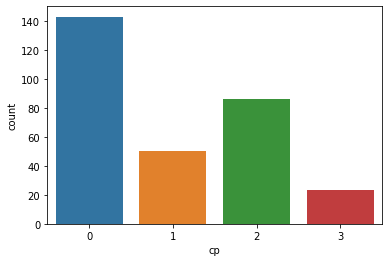

In [41]:
#cp 	 chest pain type
sns.countplot(x="cp", data= df1)
#The chest pain type of patients in this dataset does not have even distibution. 

<AxesSubplot:xlabel='fbs', ylabel='count'>

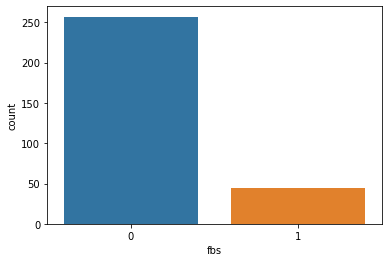

In [42]:
#fbs 	 (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
sns.countplot(x= "fbs", data= df1)
#most of the patients in this dataset have fasting blood sugar less than 120mg/dl

<AxesSubplot:xlabel='exang', ylabel='count'>

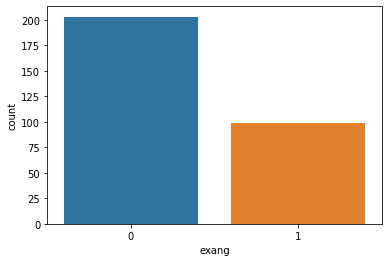

In [43]:
#exang 	 exercise induced angina (1 = yes; 0 = no)
sns.countplot(x= "exang",data= df1)
#The number of patients that don't have exercise induced angina is double to the number of patients those who have angina

<AxesSubplot:xlabel='ca', ylabel='count'>

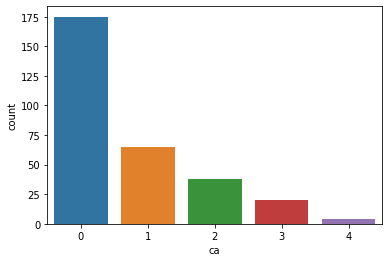

In [44]:
#ca 	 number of major vessels (0-3) colored by flourosopy
sns.countplot(x= "ca",data= df1)
#As the number of vessels increased the count decreased.

<AxesSubplot:xlabel='thal', ylabel='count'>

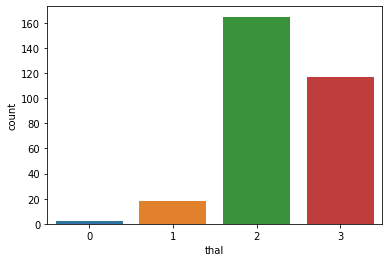

In [45]:
#thal 	 3 = normal; 6 = fixed defect; 7 = reversable defect (excel description)
sns.countplot(x= "thal",data= df1)
# The description in the excel sheet does not match the numbers in the dataset.

In [46]:
df1["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='target', ylabel='count'>

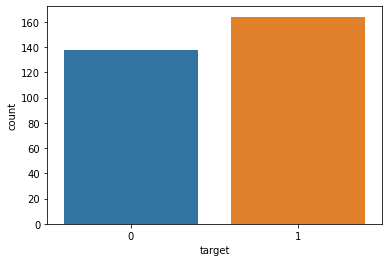

In [47]:
#target 	 1 or 0
sns.countplot(x= "target",data=df1)
#People who have heart attacks are little bit more in number than those who didn't. we can say that the target variable is almost balanced 

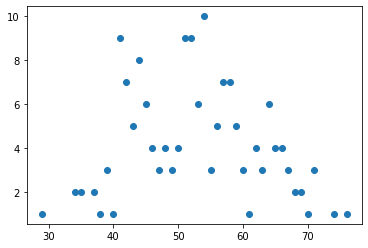

In [48]:
#Study the occurrence of CVD across different ages.
#Age vs Target (those who have heart attack)

tar_age= df1[["target","age"]]
he_att_yes= tar_age[tar_age["target"]== 1]
tar_age_grouped= he_att_yes.groupby(["age"], as_index= False).count()

plt.scatter(x= tar_age_grouped["age"], y= tar_age_grouped["target"])

#Most of the occurance of heart attack is between the age 40 and 65. Based on this scatter plot heart attack is tend to happen between the age of 40 and 65.
#Specifically Between the age of 40 and 55 have higher count(frequency). 

<AxesSubplot:xlabel='age', ylabel='count'>

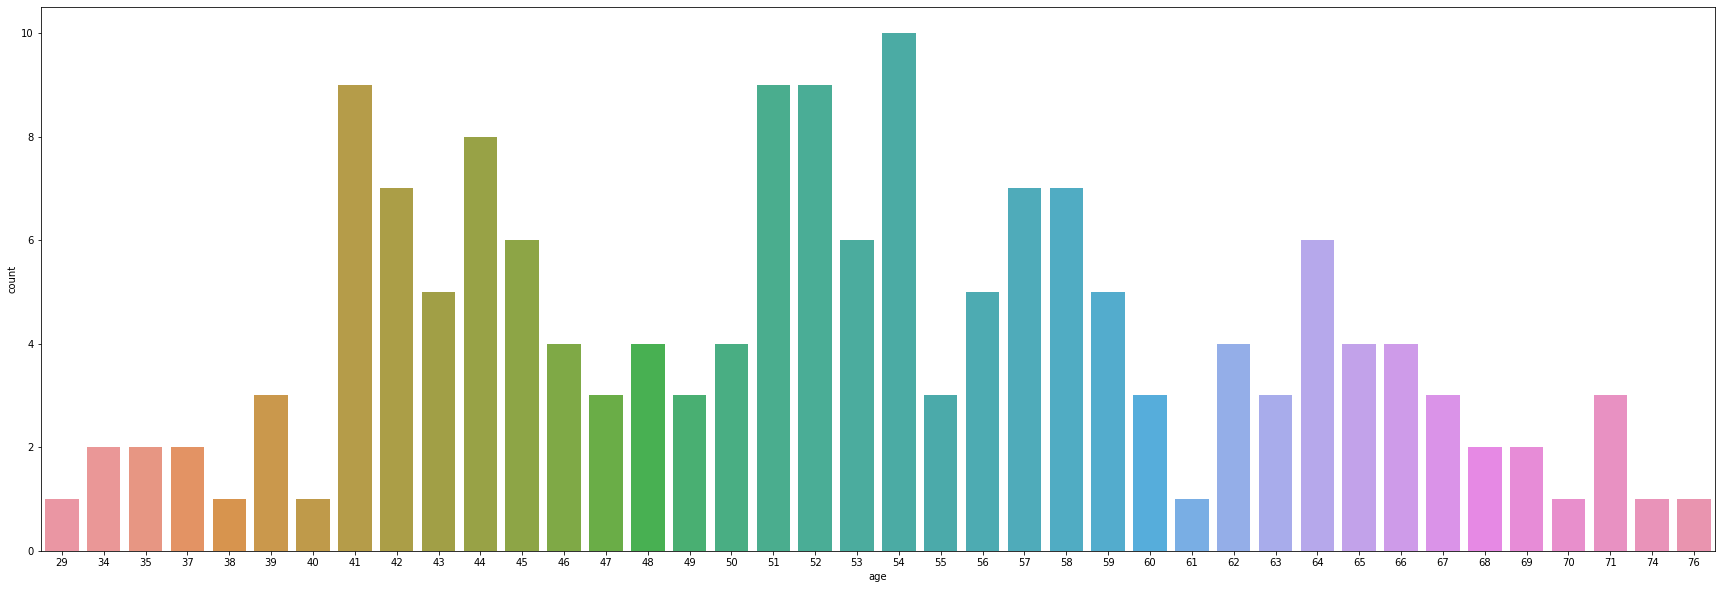

In [49]:
#Another way of looking at age vs cvd


tar_age= df1[["target","age"]]

fig = plt.figure(figsize=(30,10))

#Age vs Target (those who have heart attack)
he_att_yes= tar_age[tar_age["target"]== 1]
sorted_he_att_yes = he_att_yes.sort_values(by= "age", ascending=False)
sns.countplot(x="age", data= sorted_he_att_yes)









<AxesSubplot:xlabel='target', ylabel='trestbps'>

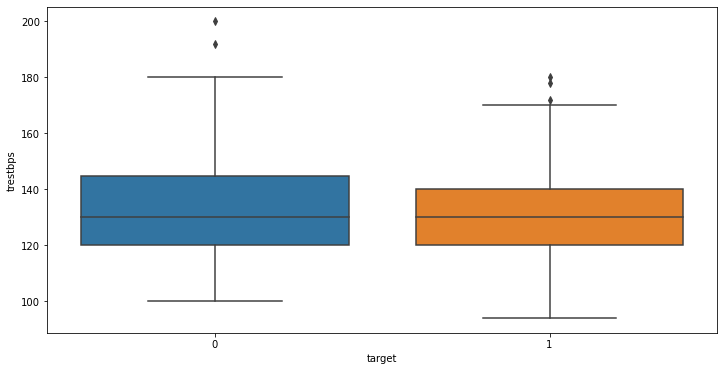

In [50]:
#Can we detect heart attack based on anomalies in resting blood pressure of the patient?
plt.figure(figsize= [12,6])
sns.boxplot(y="trestbps", x="target",data= df1)

#According to the cdc website the normal measure of blood pressure is below 120. 120 to 139 at risk and above 140 is high blood pressure.
#We can not detect heart attack based on anomalies because there are some patients who have anomalies resting blood pressure and
#didn't have heart attack. And there are some patients who have anomalies resting blood pressure and have heart attack.
# Since the anomalies are in both groups, anomalies in resting blood pressure may not detect heart attack.  



Text(0.5, 1.0, 'Those who had not have heart attack')

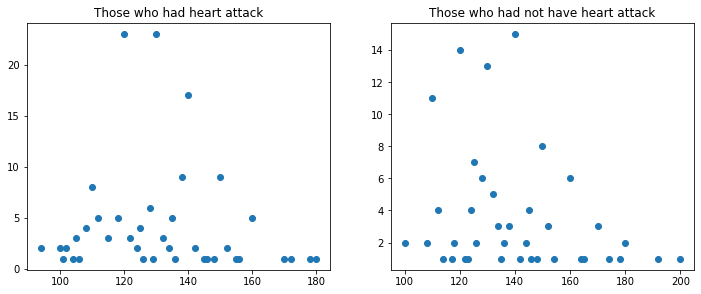

In [51]:
#Can we detect heart attack based on anomalies in resting blood pressure of the patient?


fig = plt.figure(figsize=(25,10))

ax1 = plt.subplot2grid((2,4),(0,1))
rest_blood_pre = df1[["trestbps","target"]]
heart_attack = rest_blood_pre[rest_blood_pre["target"]==1]
heart_attack_grouped = heart_attack.groupby(["trestbps"],as_index= False).count()
ax1.scatter(x= heart_attack_grouped["trestbps"], y= heart_attack_grouped["target"] )
plt.title('Those who had heart attack')

ax1 = plt.subplot2grid((2,4),(0,2))
heart_attack1 = rest_blood_pre[rest_blood_pre["target"]==0]
heart_attack_grouped1 = heart_attack1.groupby(["trestbps"],as_index= False).count()
ax1.scatter(x= heart_attack_grouped1["trestbps"], y= heart_attack_grouped1["target"] )
plt.title('Those who had not have heart attack')


#The distribution have some similarity. The distibution of the majority of resting blood pressure is from 100 to 160.
#The frequency have differences but since both groupes have anomalies we can't conclude that heart attack can be detected based on anomalies

<AxesSubplot:xlabel='sex', ylabel='count'>

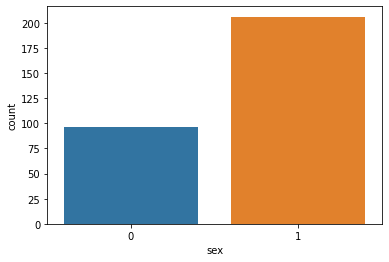

In [52]:
#Study the composition of overall patients w.r.t . gender.


sns.countplot(x="sex",data= df1)
# In the dataset there are double number of males than females

In [53]:
#Describe the relationship between cholesterol levels and our target variable.
# can use heatmap
df1[["target","chol"]].corr()
#There is  not correlation between target variable and cholesterol level.

,target,chol
target,1.000000,-0.081437
chol,-0.081437,1.000000


In [54]:
#What can be concluded about the relationship between peak exercising and occurrence of heart attack?
df1[["target","slope"]].corr()

#There is medium postive correlation between target variable and peak exercising. This means when peak exercise increase the occurrence of heart attack tend to increase. 


,target,slope
target,1.00000,0.34394
slope,0.34394,1.00000


In [55]:
#Is thalassemia a major cause of CVD?
df1[["thalach","target"]].corr() 
#There is medium postive correlation between target variable and thalassemia. This means that when thalassemia increases the occurrence of heart attack is more likely to increase.
#We can't say thalassemia is a major cause of CVD but they are correlated and something we need to pay attention to. 

,thalach,target
thalach,1.000000,0.419955
target,0.419955,1.000000


<AxesSubplot:>

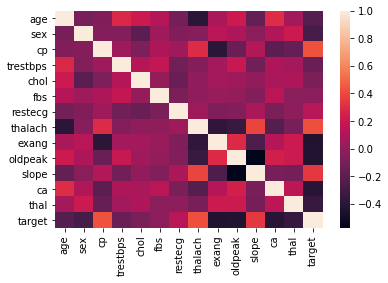

In [58]:
# How are the other factors determining the occurrence of CVD?
sns.heatmap(df1.corr())
#explanation below one by one

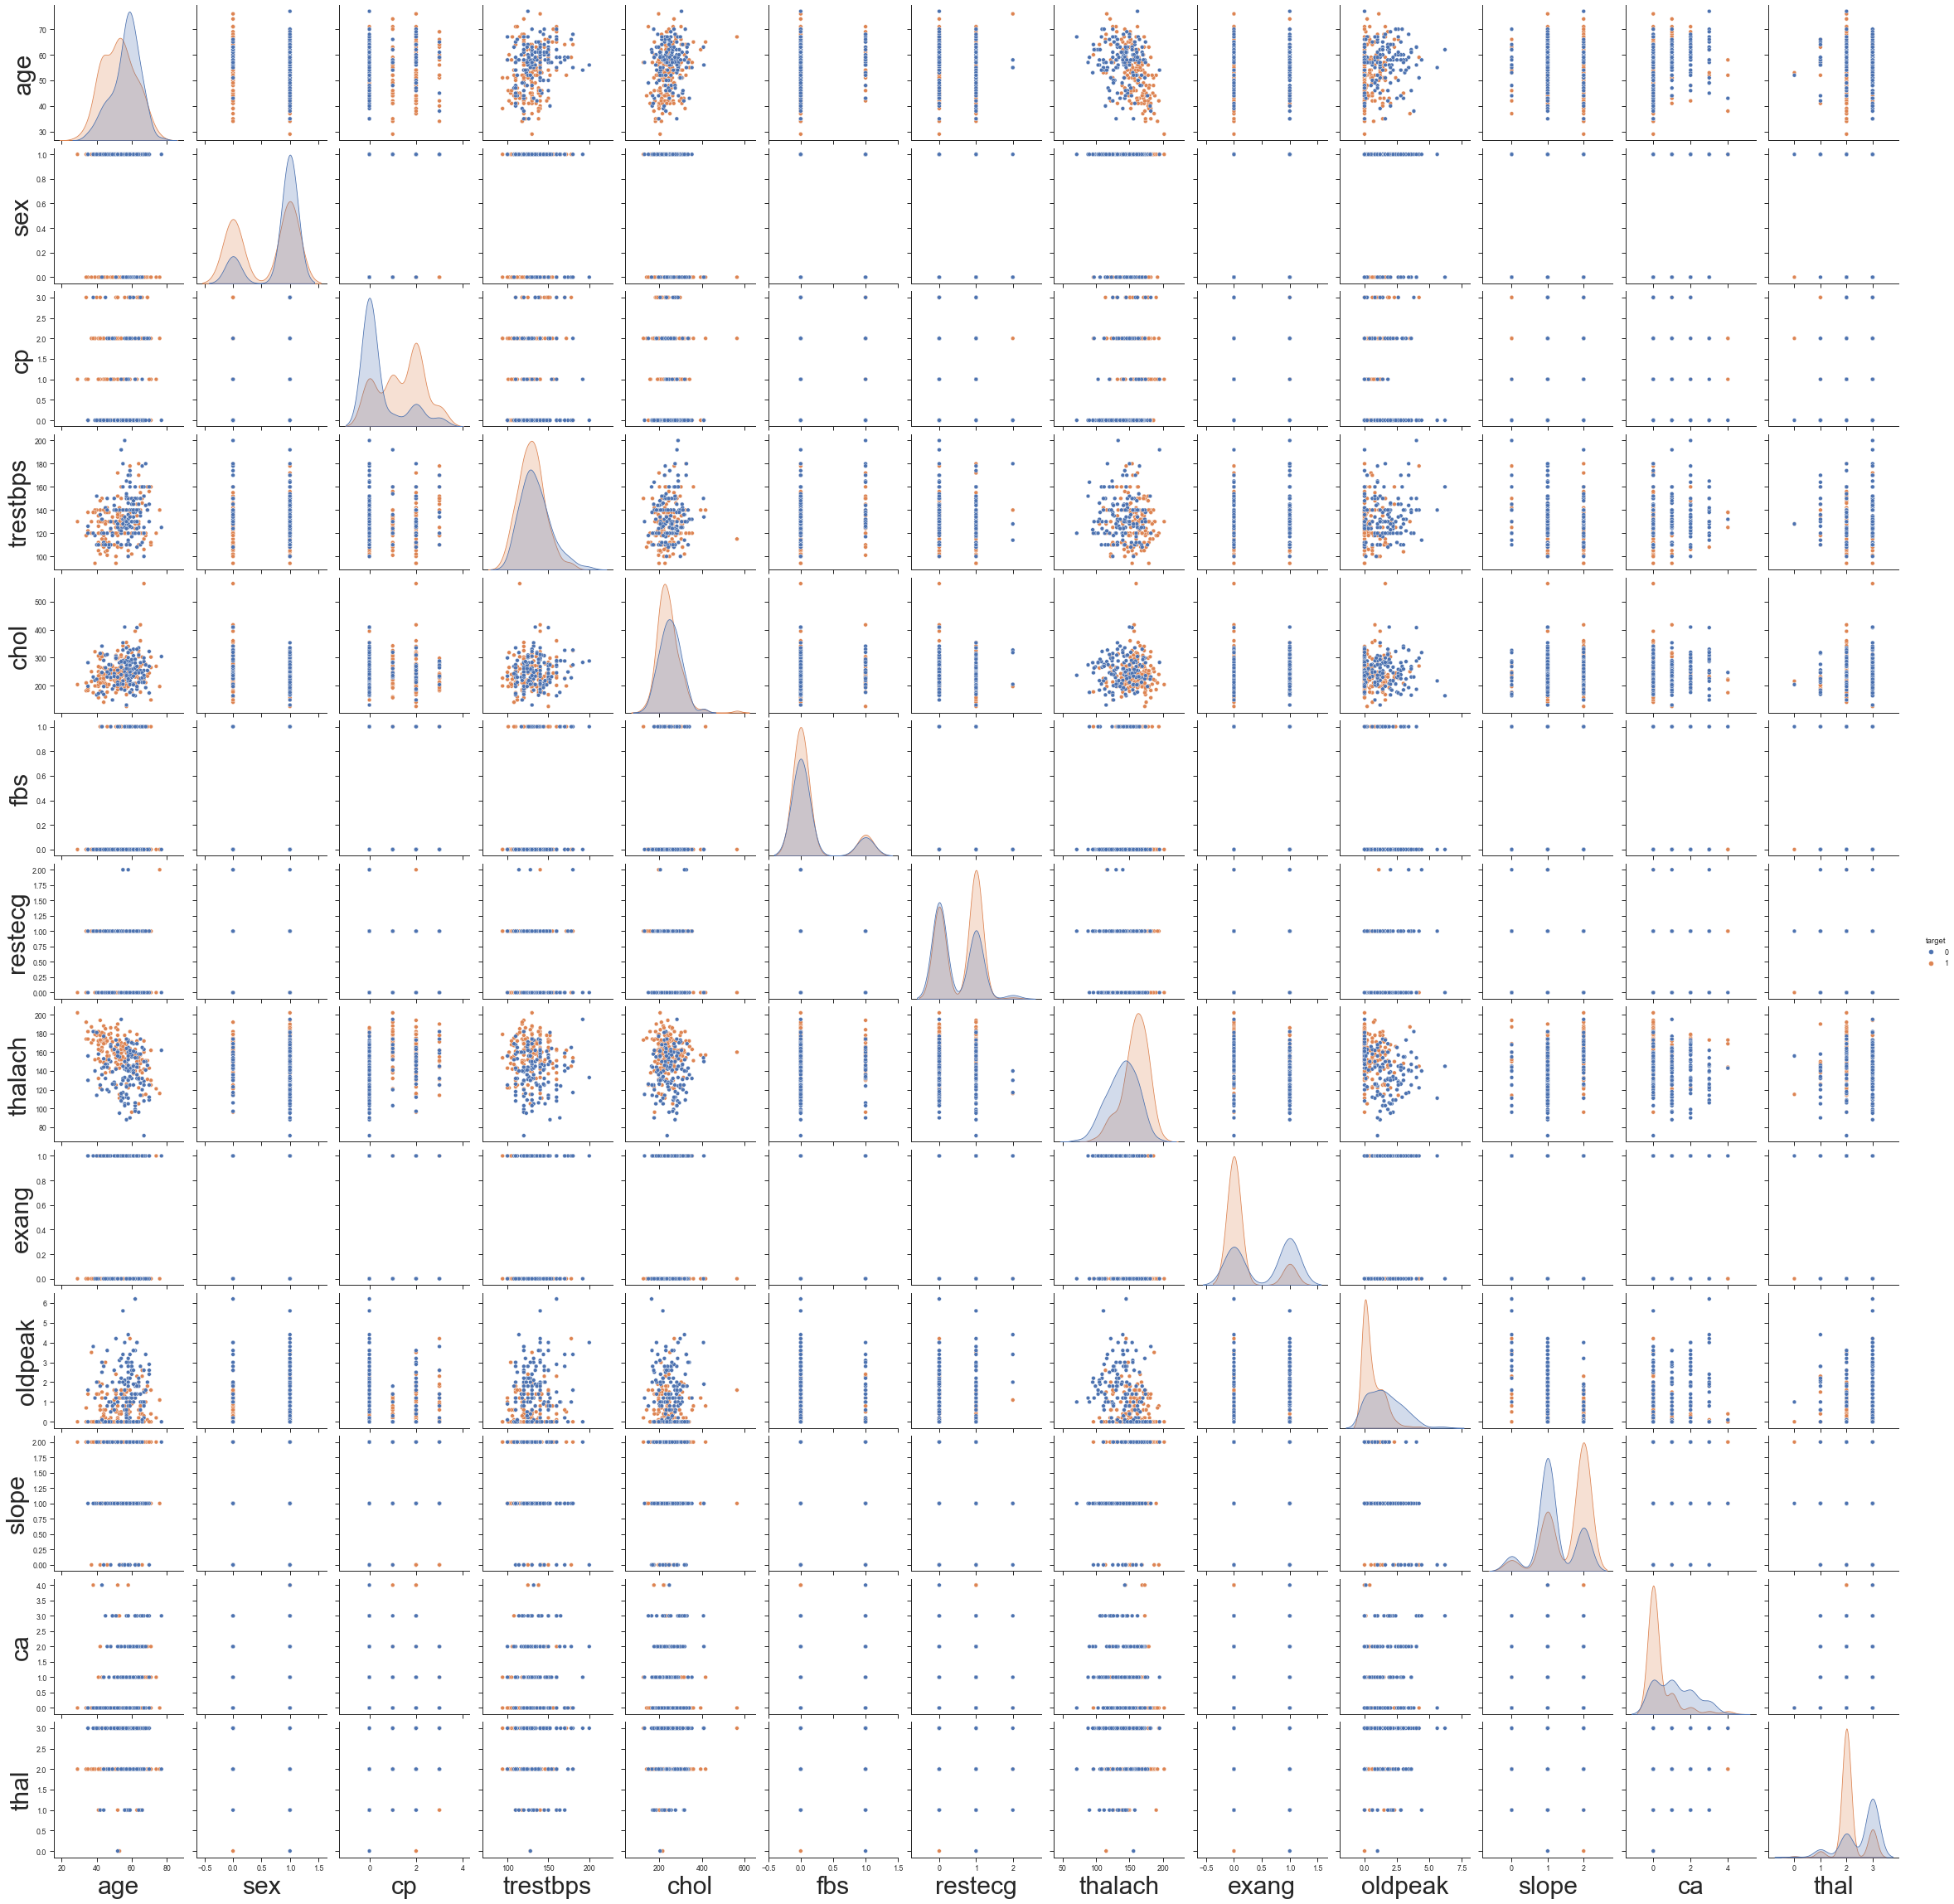

In [59]:
sns.set(style="ticks", color_codes=True)
sns.set_context("paper", rc={"axes.labelsize":30})
sns.pairplot(df1,hue = "target")
#explanation below one by one

,sex,target
sex,1.000000,-0.283609
target,-0.283609,1.000000


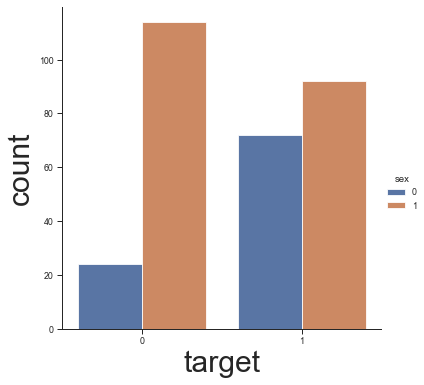

In [60]:
# How are the other factors determining the occurrence of CVD?


#sex 	 (1 = male; 0 = female) vs target 	 1 or 0
sns.catplot(hue="sex", x="target", kind="count", data=df1)
df1[["sex","target"]].corr()
#Males have higher number overall in the dataset. Also, males had heart attack more than females. Maybe more males tend to have heart attack. 
#There is negative low correlation between sex and target. This means that as one variable increase the other decreases. 

,cp,target
cp,1.00000,0.43208
target,0.43208,1.00000


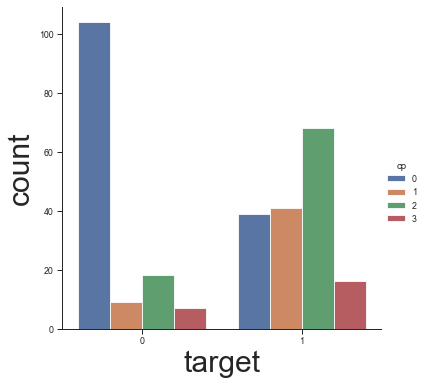

In [61]:
#cp 	 chest pain type vs target 	 1 or 0
sns.catplot(hue="cp", x="target", kind="count", data=df1)
df1[["cp","target"]].corr()
#Except chest pain type zero(0) all other types of chest pain are higher in the patients who have heart attack. This could mean that
# there is more chest pain in the people who have heart attack. This could be one of the factors to determine CVD.
# Chest pain and target variable have medium postive correlation. This means that as the chest pain increases the target variable
#tend to increase.

,fbs,target
fbs,1.000000,-0.026826
target,-0.026826,1.000000


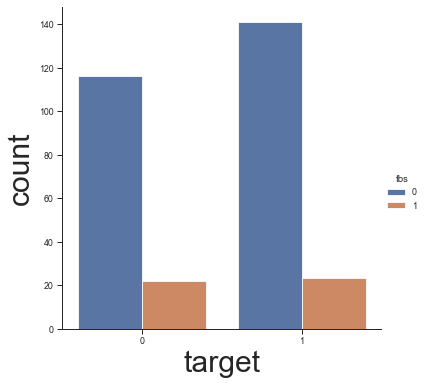

In [62]:
#fbs 	 (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) vs target 	 1 or 0
sns.catplot(hue="fbs", x="target", kind="count", data=df1)
df1[["fbs","target"]].corr()
# Fasting blood sugar and target variable do not correlate. 
# Most of the patients have a fasting blood sugar less than 120mg/dl

,restecg,target
restecg,1.000000,0.134874
target,0.134874,1.000000


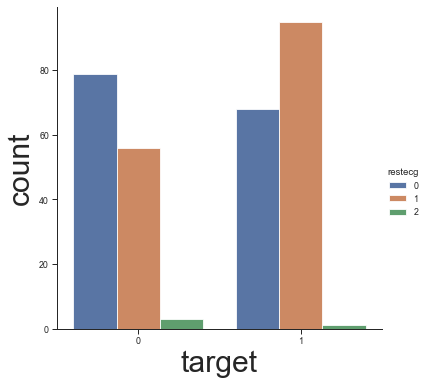

In [63]:
#restecg 	 resting electrocardiographic results vs target 	 1 or 0
sns.catplot(hue="restecg", x="target", kind="count", data=df1)
df1[["restecg","target"]].corr()
# Resting ECG results of zero and two are higher in those who do not have heart attack.
#Resting ECG results of one is higher in those who have heart attack. It can be something to pay attention to.
#Resting ECG result and target variable have low postive correlation. As the resting ECG result goes up target varible goes up

,exang,target
exang,1.000000,-0.435601
target,-0.435601,1.000000


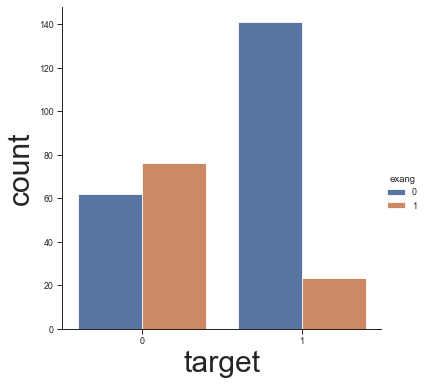

In [64]:
#exang 	 exercise induced angina (1 = yes; 0 = no) vs target 	 1 or 0
sns.catplot(hue="exang", x="target", kind="count", data=df1)
df1[["exang","target"]].corr()
# There is higher exercise induced angina in those who do not have heart attack than in those who do.
#There is negative medium correlation between exercise induced angina and target variable. As exercise induced angina increase the
#target variable decreases. 

,oldpeak,target
oldpeak,1.000000,-0.429146
target,-0.429146,1.000000


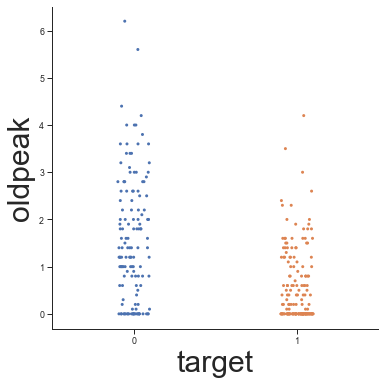

In [65]:
#oldpeak 	 ST depression induced by exercise relative to rest vs target 	 1 or 0
sns.catplot(x="target", y="oldpeak",kind="strip",s= 3,data=df1)

df1[["oldpeak","target"]].corr()
#Those who have heart attack have low value of oldpeak than those who haven't. 
#ST depression induced by exercise relative to rest and target variable have a medium negative correlation. This means that as 
#oldpeak increases the target variable decreases. 

,ca,target
ca,1.000000,-0.408992
target,-0.408992,1.000000


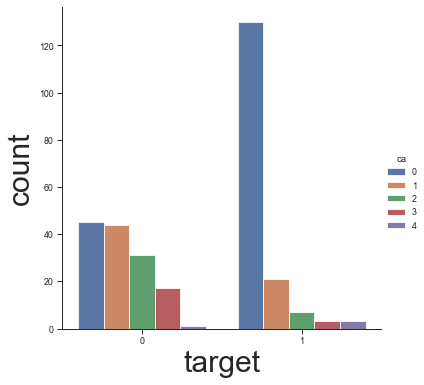

In [66]:
#ca 	 number of major vessels (0-3) colored by flourosopy vs target 	 1 or 0
sns.catplot(hue="ca", x="target", kind="count", data=df1)
df1[["ca","target"]].corr()
# Except zero and four number of vessels all of the vessels are higher in those who do not have heart attack.
#Number of major vessels and target variable have negative medium correlation. As number of vessels increase the target variable tend to decrease.


,thal,target
thal,1.000000,-0.343101
target,-0.343101,1.000000


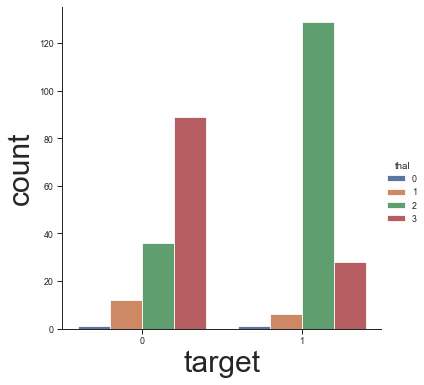

In [67]:
#thal 	 3 = normal; 6 = fixed defect; 7 = reversable defect vs target 	 1 or 0
sns.catplot(hue="thal", x="target", kind="count", data=df1)
df1[["thal","target"]].corr()
# The thal and target variable have medium negative correlation. As one variable increases the other decreases

In [68]:
#Use a pair plot to understand the relationship between all the given variables.
df1[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]].corr()

#We can read the following table by using this instructions. 0.1 to 0.3 is low correlation, 0.4 to 0.6 medium correlation and above 0.6 high correlation.
#It can be negative or postive correlation. If it is negative it means as one increase the other tend to decrease. If it is postive
# both variables tend to increase or decrease at the same time. 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090


<AxesSubplot:>

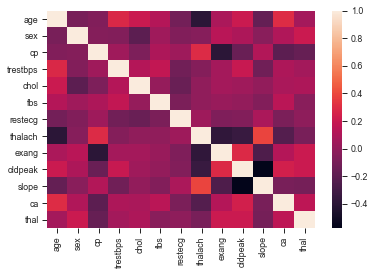

In [69]:
df2= df1[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]].copy()
sns.heatmap(df2.corr())

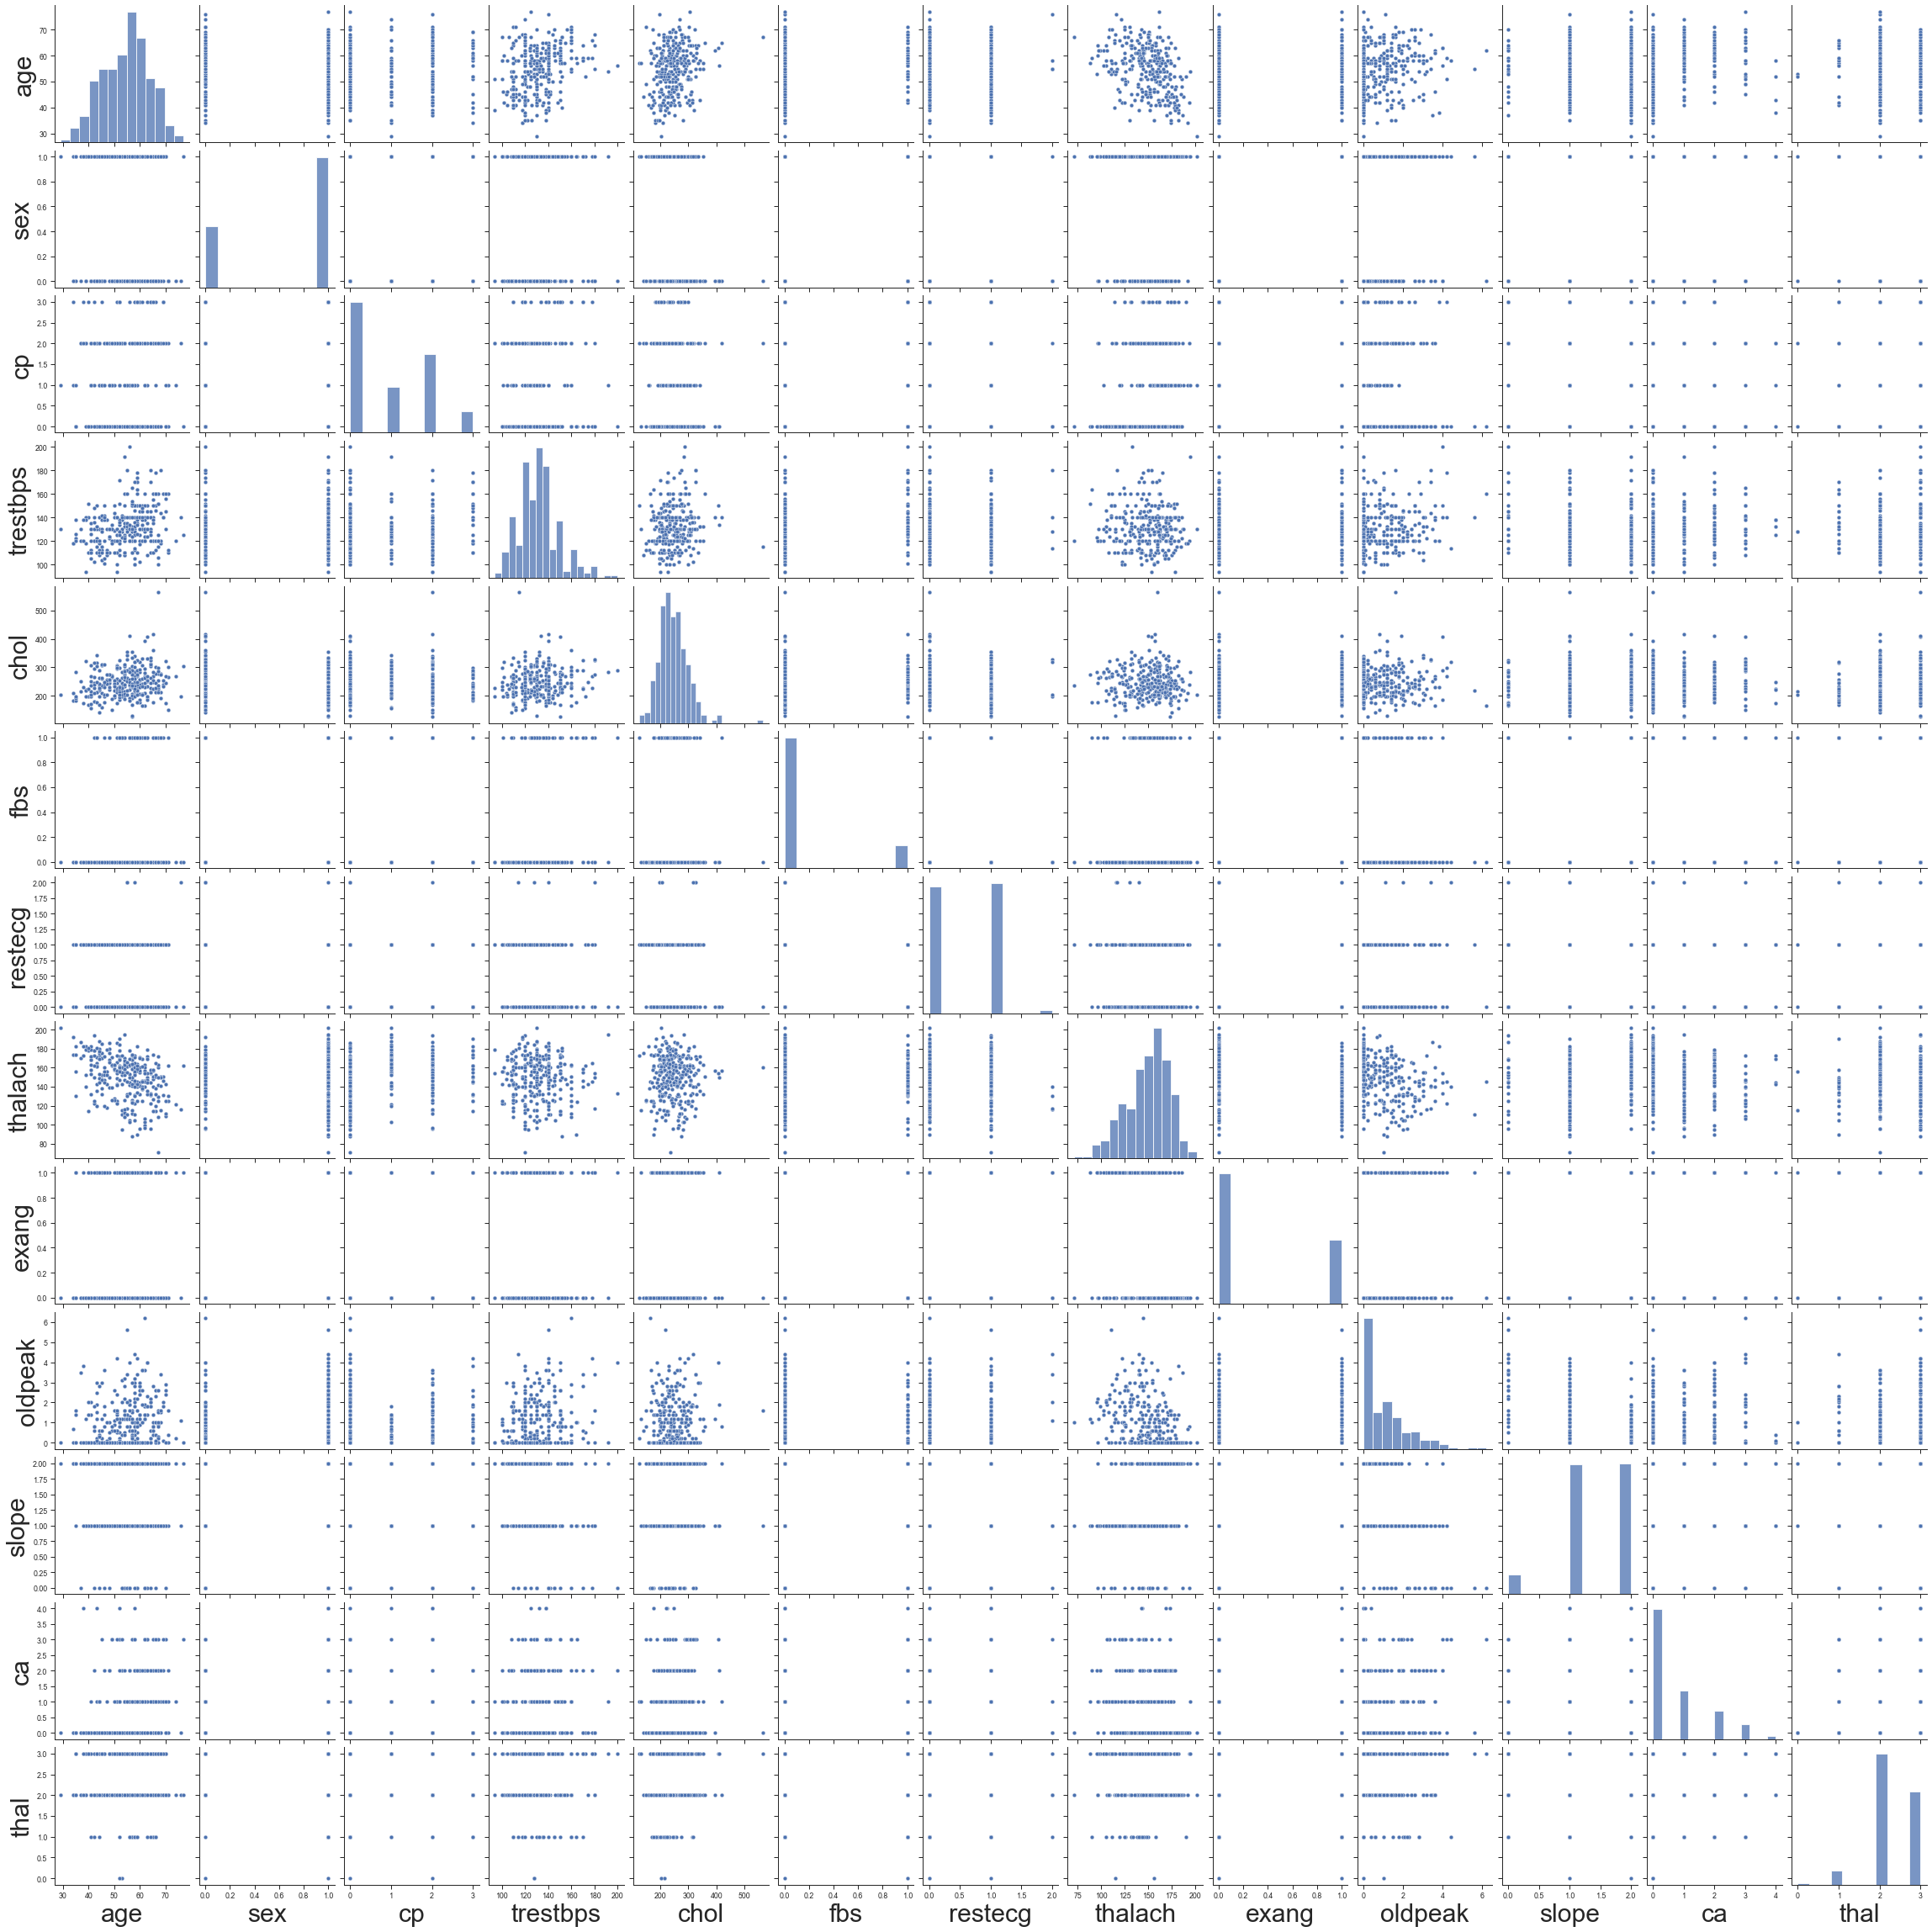

In [70]:
sns.set(style="ticks", color_codes=True)
sns.set_context("paper", rc={"axes.labelsize":30})
sns.pairplot(df2)


In [71]:
#droping chol and fbs because they don't have correlation with target variable and using the remaining of the variables to build the model
df2= df1.drop(["chol","fbs"],axis=1).copy()

In [72]:
#changing categorical variables to dummy variables
colnames= ["sex","cp","exang","thal"]

df3= pd.get_dummies(df2, columns= colnames,drop_first=True)

In [73]:
# split the data to train and test data
train,test= train_test_split(df3, train_size= 0.7, random_state= 3)

train_y=train.pop("target")
train_x= train

test_y=test.pop("target")
test_x=test


In [74]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(train_x,train_y)
pv= log_model.predict(test_x)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_model.score(test_x, test_y)))

## The model correctly predicted whether or not someone have heart attack 85% of the time. 

Accuracy of logistic regression classifier on test set: 0.85


In [75]:
confusion_matrix = confusion_matrix(test_y, pv)
print(confusion_matrix)
# The model predicted 77 correctly and 14 incorrectly. 

[[27  9]
 [ 5 50]]
